## CV2 matches

In [19]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance
plt.rcParams['figure.figsize'] = 15, 10

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
dino_names = {'a': 'Allosaurus', 'b': 'Baryonyx', 'c': 'Caudipteryx', 
              'd': 'Diplodocus', 'e': 'Edmontonia', 'f': 'Fukuiraptor', 
              'g': 'Gallimimus', 'h': 'Hadrosaurus', 'i': 'Irritator',
              'j': 'Jobaria', 'k': 'Kentrosaurus', 'l': 'Leptoceratops',
              'm': 'Mussaurus', 'n': 'Noasaurus', 'o': 'Oviraptor',
              'p': 'Pterodactyl', 'q': 'Quaesitosaurus', 'r': 'Rebbachisaurus',
              's': 'Stegosaurus', 't': 'Tyrannosaurus', 'u': 'Urbacodon',
              'v': 'Velociraptor', 'w': 'Wuerhosaurus', 'x': 'Xenoceratops',
              'y': 'Yinlong', 'z': 'Zephyrosaurus'}

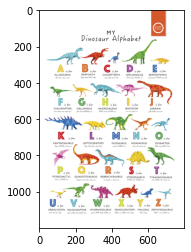

In [4]:
source = cv2.imread('abc.png')
image = cv2.cvtColor(source.copy(), cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [33]:
dinos_dict = {'a': (205, 301, 55, 247), 'b': (205, 301, 225, 385), 'c': (230, 294, 382, 446), 
              'd': (160, 293, 480, 650), 'e': (258, 298, 612, 722), 'f': (415, 479, 55, 183), 
              'g': (408, 472, 180, 286), 'h': (400, 486, 282, 442), 'i': (405, 474, 426, 586),
              'j': (385, 486, 540, 742), 'k': (575, 662, 55, 247), 'l': (610, 664, 240, 368),
              'm': (570, 666, 365, 515), 'n': (590, 659, 515, 621), 'o': (590, 664, 620, 721),
              'p': (765, 861, 70, 171), 'q': (735, 851, 188, 336), 'r': (760, 856, 310, 470),
              's': (770, 854, 480, 608), 't': (750, 851, 597, 757), 'u': (990, 1032, 63, 151),
              'v': (950, 1036, 150, 278), 'w': (956, 1040, 285, 413), 'x': (944, 1040, 420, 548), 
              'y': (980, 1034, 561, 631), 'z': (975, 1039, 634, 730)}

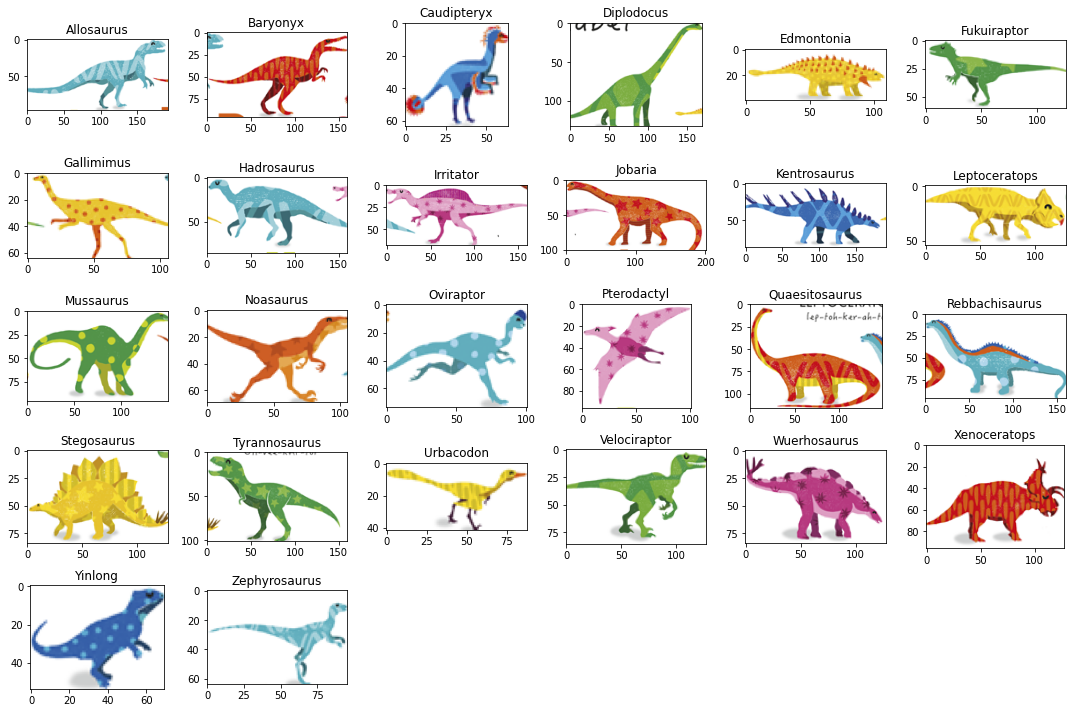

In [15]:
def show_dinos(image, dinos_dict):
    n = 0
    for dino in dinos_dict:
        coords = dinos_dict[dino]
        template = image[coords[0]:coords[1], coords[2]:coords[3]]
        plt.subplot(5, 6, n+1)
        plt.imshow(template)
        plt.title(dino_names[dino])
        n += 1

    plt.tight_layout()
    plt.show()
show_dinos(image, dinos_dict)

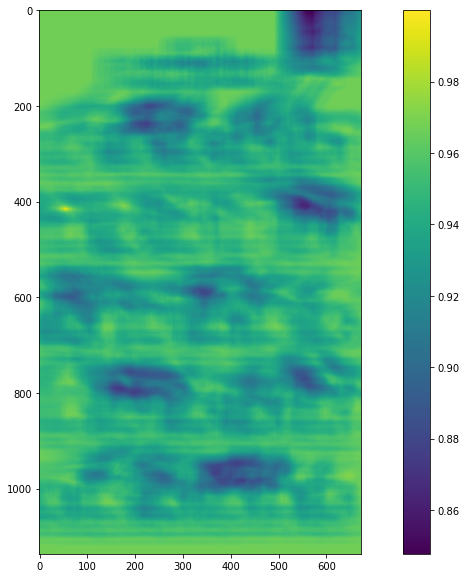

max = 0.9999999403953552, y = 415, x = 55


In [34]:
coords = dinos_dict['f']
template = image[coords[0]:coords[1], coords[2]:coords[3]]

match_source = cv2.matchTemplate(image, template, cv2.TM_CCORR_NORMED)
plt.imshow(match_source)
plt.colorbar()
plt.show()
max_match = np.where(match_source == match_source.max())
print(f'max = {match_source.max()}, y = {max_match[0][0]}, x = {max_match[1][0]}')

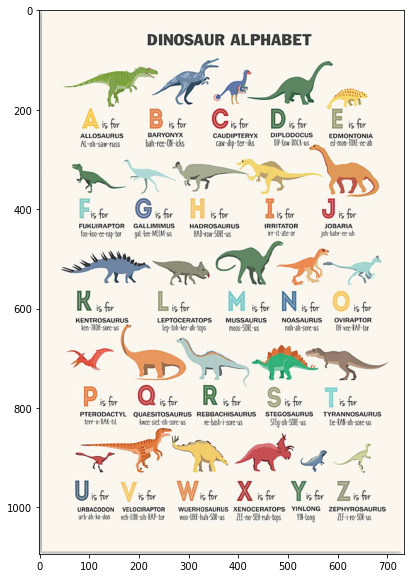

In [12]:
source2 = cv2.imread('ABC.png')
test_image = cv2.cvtColor(source2.copy(), cv2.COLOR_BGR2RGB)
plt.imshow(test_image)
plt.show()

In [13]:
dinos_test = {'a': (110, 196, 55, 237), 'b': (95, 191, 235, 363), 'c': (117, 191, 358, 427), 
              'd': (98, 194, 427, 591), 'e': (155, 197, 577, 673), 'f': (308, 372, 65, 161), 
              'g': (299, 363, 169, 270), 'h': (304, 368, 269, 407), 'i': (297, 371, 395, 565),
              'j': (270, 376, 541, 684), 'k': (480, 544, 60, 220), 'l': (502, 566, 225, 353),
              'm': (462, 558, 354, 492), 'n': (477, 551, 476, 582), 'o': (492, 556, 572, 700),
              'p': (680, 734, 55, 151), 'q': (630, 748, 160, 288), 'r': (654, 750, 278, 428),
              's': (672, 746, 428, 546), 't': (676, 750, 537, 697), 'u': (885, 927, 73, 159),
              'v': (838, 934, 140, 268), 'w': (852, 938, 268, 386), 'x': (850, 931, 393, 513), 
              'y': (885, 927, 525, 581), 'z': (870, 934, 590, 671)}

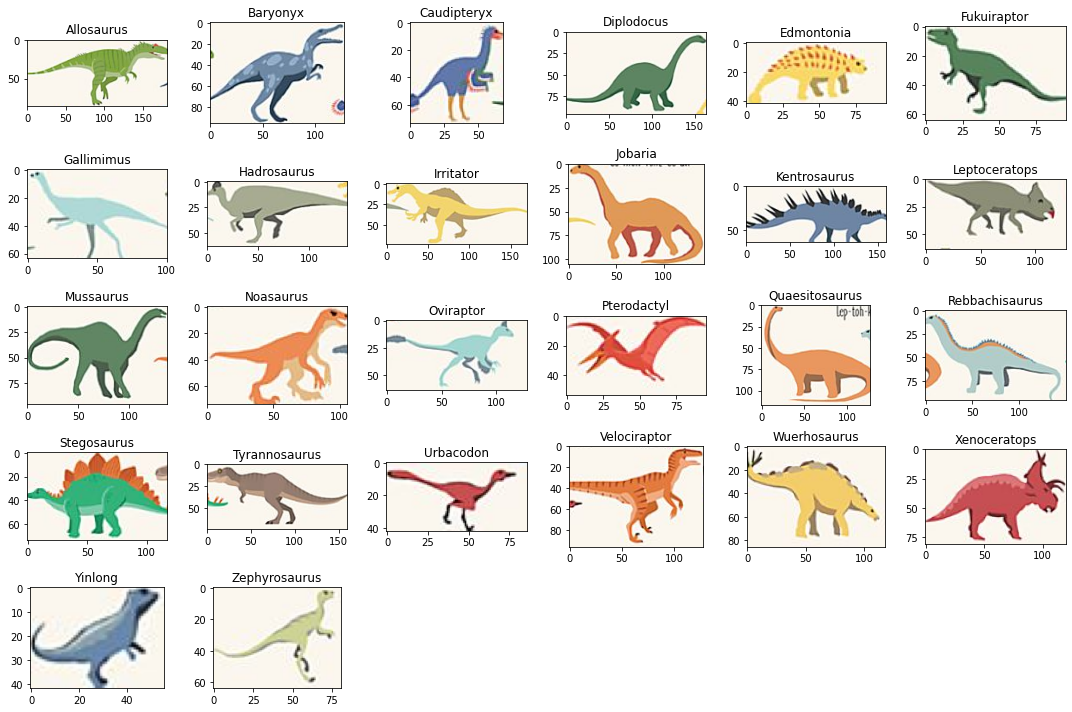

In [16]:
show_dinos(test_image, dinos_test)

### Matches

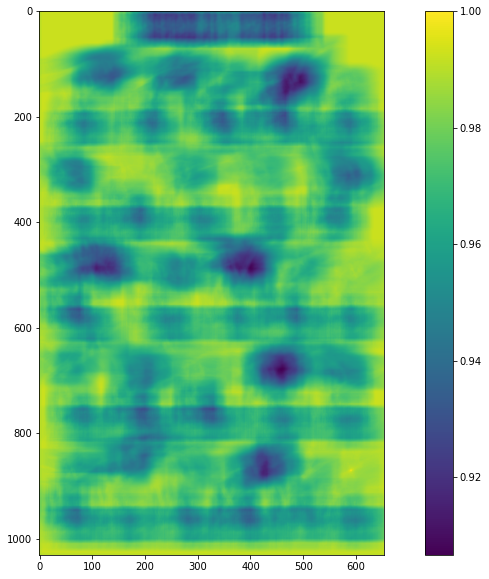

max = 0.991, y = 870, x = 590


In [17]:
match2 = cv2.matchTemplate(test_image, template, cv2.TM_CCORR_NORMED)
plt.imshow(match2)
plt.colorbar()
plt.show()
maxx =  match2.max()
max_match = np.where(match2 == maxx)
maxx_r = round(maxx,3)
print(f'max = 0.991, y = {max_match[0][0]}, x = {max_match[1][0]}')

In [22]:
distances = []
matches = {}
un_matches = {}
for dino in dinos_dict:
    coords = dinos_dict[dino]
    delta_y = coords[1] - coords[0]
    delta_x = coords[3] - coords[2]
    
    template = image[coords[0]:coords[1], coords[2]:coords[3]].copy()
    
    coords_test = dinos_test[dino]
    dino_size = distance.euclidean((coords_test[2], coords_test[0]), (coords_test[3], coords_test[1]))

    a = (coords_test[2], coords_test[0]) # x_true, y_true
    template = image[coords[0]:coords[1], coords[2]:coords[3]].copy()
    match2 = cv2.matchTemplate(test_image, template, cv2.TM_CCORR_NORMED)
    max_match = np.where(match2 == match2.max())
    b = (max_match[1][0], max_match[0][0]) # x, y
    dst = distance.euclidean(a, b)
    if dst < 90:
        print(dino, dst)
        
        matches[dino] = (b[1], b[1]+delta_y, b[0], b[0]+delta_x)
    else:
        un_matches[dino] = (b[1], b[1]+delta_y, b[0], b[0]+delta_x)
    distances.append(dst)
    #print(f'max y - {max_match[0]}, x - {max_match[1]}')
distances_np = np.array(distances)

c 3.0
d 43.56604182158393
e 15.132745950421556
h 26.40075756488817
k 9.899494936611665
m 9.0
n 1.0
o 11.180339887498949
q 2.23606797749979
r 6.324555320336759
u 5.0
w 8.246211251235321
x 13.0
y 11.40175425099138


## ResNet-18 matches

In [24]:
import torch
import torchvision
import torch.nn.functional as F

In [25]:
# define model
model = torchvision.models.resnet18(pretrained=True)
layer4_features = None
avgpool_emb = None

def get_features(module, inputs, output):
    global layer4_features
    layer4_features = output

def get_embedding(module, inputs, output):
    global avgpool_emb
    avgpool_emb = output

model.layer4.register_forward_hook(get_features)
model.avgpool.register_forward_hook(get_embedding)
model.eval()

preprocess = torchvision.transforms.Compose([
    torchvision.transforms.ToPILImage(),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


/opt/conda/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [35]:
# get features
input_tensor = preprocess(template)
model(input_tensor[None,:,:,:])
template_features = avgpool_emb

input_tensor = preprocess(test_image)
input_batch = input_tensor.unsqueeze(0)
model(input_batch)
image_features = layer4_features
image_features.shape

torch.Size([1, 512, 35, 23])

#### F.normalize dim=1 pow=1

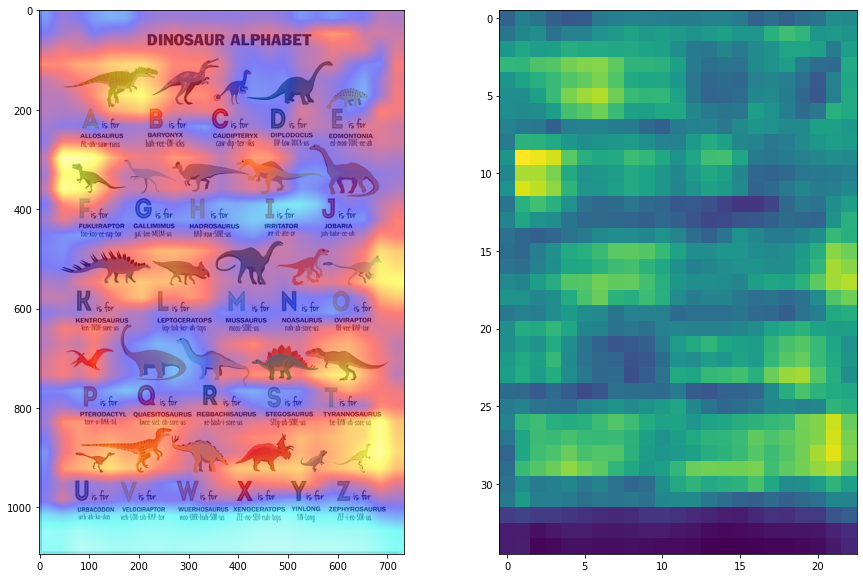

max = 254, y = 296, x = 48


In [36]:
plt.rcParams['figure.figsize'] = 15, 10

image_features_n = F.normalize(image_features, dim=1, p=1)
template_features_n = F.normalize(template_features , dim=1, p=1)
heat_map = F.conv2d(image_features_n, template_features_n)

heat_map = heat_map.squeeze()
heat_map = heat_map - heat_map.min()
heat_map = ((heat_map / heat_map.max()) * 255).byte()
heat_map = heat_map.squeeze().cpu().detach().numpy()
image_height, image_width = test_image.shape[:2]
heat_map_resize = cv2.resize(heat_map.copy(), (image_width, image_height))
heat_map_rgb = cv2.applyColorMap(heat_map_resize, cv2.COLORMAP_JET)
heat_map_rgb = 255 - heat_map_rgb
heat_map_rgb = heat_map_rgb.astype(np.uint8)
inverted_heat_map = cv2.applyColorMap(heat_map_rgb, cv2.COLORMAP_JET)
res = cv2.addWeighted(test_image, 0.5, inverted_heat_map, 0.5, 0)
res = cv2.addWeighted(test_image, 0.5, heat_map_rgb, 0.5, 0)
cv2.imwrite('heat_map_dino_n1.jpg', cv2.cvtColor(res, cv2.COLOR_RGB2BGR))

plt.subplot(1, 2, 1)
plt.imshow(res)
plt.subplot(1, 2, 2)
plt.imshow(heat_map)
#plt.colorbar()
plt.show()

maxx = np.where(heat_map_resize==heat_map_resize.max())
print(f'max = {heat_map_resize.max()}, y = {maxx[0][0]}, x = {maxx[1][0]}')

#### normalize_each_feature

In [37]:
def cat_template_features(features, shape):
    for i in range(shape[3]):
        for j in range(shape[2]):
            if j == 0:
                line = features
                continue
            line = torch.cat([line, features], dim=2)
        if i == 0:
            cat_features = line
            continue
        cat_features = torch.cat([cat_features, line], dim=3)
    return cat_features

In [38]:
image_norm = image_features.norm(2, dim=[2,3], keepdim=True)
image_features_n = F.normalize(image_features, dim=[2,3], p=2)

/opt/conda/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


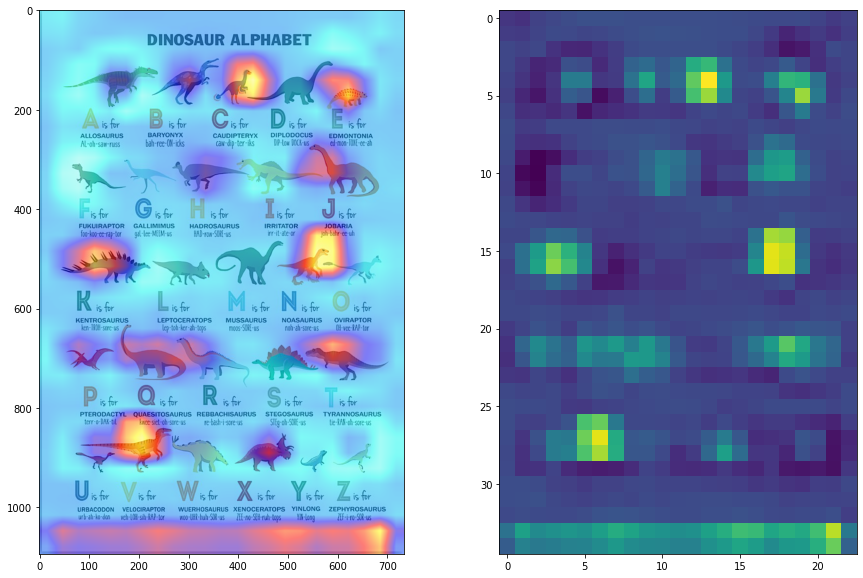

max = 254, y = 140, x = 430


In [39]:
template_features_n = template_features / image_norm
cat_features = cat_template_features(template_features_n, image_features_n.shape)
# (The distance ∥FXL−FCL∥^2)
loss = F.mse_loss(image_features_n, cat_features, reduce=False)
heat_map = loss.sum(dim=1)
heat_map = heat_map.squeeze()
heat_map = heat_map - heat_map.min()
heat_map = ((heat_map / heat_map.max()) * 255).byte()
heat_map = heat_map.squeeze().cpu().detach().numpy()
image_height, image_width = test_image.shape[:2]
heat_map_resize = cv2.resize(heat_map.copy(), (image_width, image_height))
heat_map_rgb = cv2.applyColorMap(heat_map_resize, cv2.COLORMAP_JET)
heat_map_rgb = 255 - heat_map_rgb
heat_map_rgb = heat_map_rgb.astype(np.uint8)
inverted_heat_map = cv2.applyColorMap(heat_map_rgb, cv2.COLORMAP_JET)
res = cv2.addWeighted(test_image, 0.5, inverted_heat_map, 0.5, 0)
res = cv2.addWeighted(test_image, 0.5, heat_map_rgb, 0.5, 0)
cv2.imwrite('heat_map_dino_n1.jpg', cv2.cvtColor(res, cv2.COLOR_RGB2BGR))

plt.subplot(1, 2, 1)
plt.imshow(res)
plt.subplot(1, 2, 2)
plt.imshow(heat_map)
#plt.colorbar()
plt.show()

maxx = np.where(heat_map_resize==heat_map_resize.max())
print(f'max = {heat_map_resize.max()}, y = {maxx[0][0]}, x = {maxx[1][0]}')

### Crop2Crop

In [41]:
#Img2vec
#get embbedings
# dinos_dict
for n, dino in enumerate(dinos_dict):
    coords = dinos_dict[dino]
    template = image[coords[0]:coords[1], coords[2]:coords[3]]
    input_tensor = preprocess(template)
    model(input_tensor[None,:,:,:])
    features = avgpool_emb
    if n == 0:
        dinos_emb = features
        continue
    dinos_emb = torch.cat([dinos_emb, features])
dinos_emb = dinos_emb.squeeze()

In [42]:
# dinos_test
for n, dino in enumerate(dinos_test):
    coords = dinos_test[dino]
    template = test_image[coords[0]:coords[1], coords[2]:coords[3]]
    input_tensor = preprocess(template)
    model(input_tensor[None,:,:,:])
    features = avgpool_emb
    if n == 0:
        test_emb = features
        continue
    test_emb = torch.cat([test_emb, features])
test_emb = test_emb.squeeze()

In [43]:
# Multipluing
# normalize p=2
dinos_emb_n = F.normalize(dinos_emb, dim=1, p=2)
test_emb_n = F.normalize(test_emb, dim=1, p=2)
res_mat = dinos_emb_n@test_emb_n.T
_, ind = torch.max(res_mat, dim=1)
p2_matches = [key for n, key in enumerate(dinos_dict) if n == ind[n]]
print(len(p2_matches), *p2_matches)
p2_unmatches = dict()
for n, key in enumerate(dinos_dict):
    if n != ind[n]:
        p2_unmatches[key] = list(dinos_test.keys())[ind[n]]

13 b c e f k m n q r s u x y


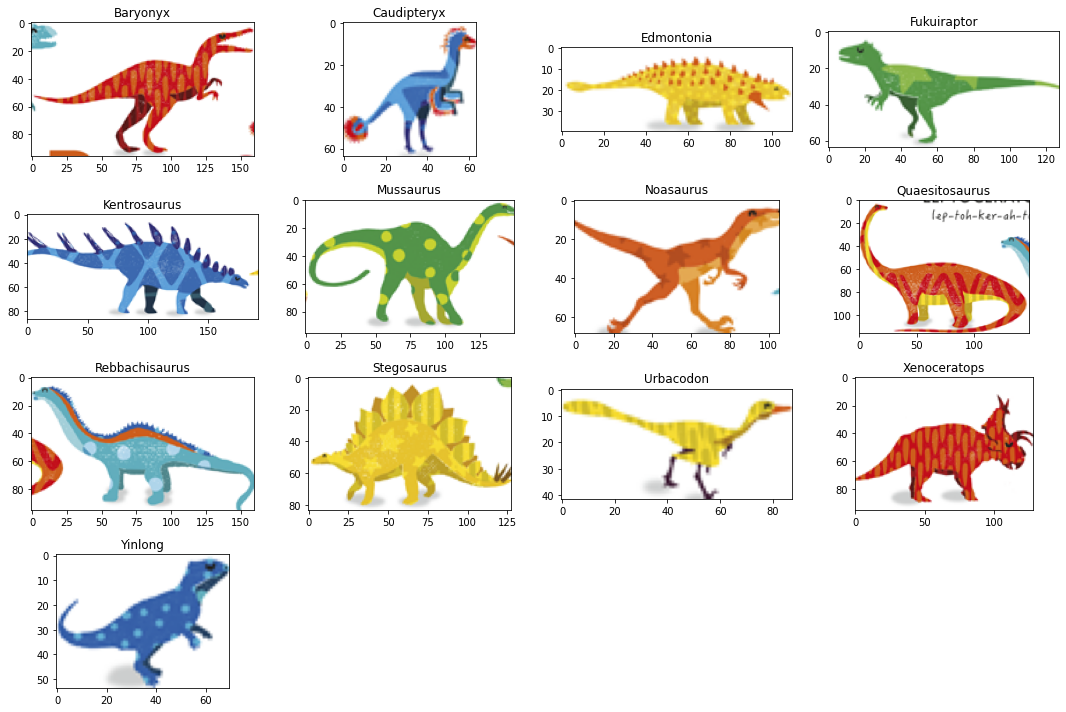

In [45]:
n = 0
for dino in p2_matches: # without_matches p1_matches  p2_matches
    coords = dinos_dict[dino]
    template = image[coords[0]:coords[1], coords[2]:coords[3]]
    plt.subplot(4, 4, n+1)
    plt.imshow(template)
    plt.title(dino_names[dino])
    n += 1

plt.tight_layout()
plt.show()